In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')


# 10.1

### 10.1.6

In [2]:
# outer boundary
# G = 1
# Y = a/M

thetas = np.arange(0,np.pi/2,0.01)

@np.vectorize
def omega(theta,a,M):
    Y = float(a/M)
    return Y**2/(a*(1 + np.sqrt(1 - (Y*np.cos(theta))**2) + (Y*np.sin(theta))**2))

@np.vectorize
def a_omega(theta,Y):
    return Y**2/(1 + np.sqrt(1 - (Y*np.cos(theta))**2) + (Y*np.sin(theta))**2)
    

def plot(Y):
    plt.figure()
    plt.plot(180*thetas/np.pi,a_omega(thetas,Y))
    plt.xlabel('$\Theta$')
    plt.ylabel('a$\Omega$')
    plt.title('Outer ergosphere surface')
    plt.show()

ipw.interact(plot, Y=(0,1,0.01))

interactive(children=(FloatSlider(value=0.0, description='Y', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot(Y)>

### 10.1.7

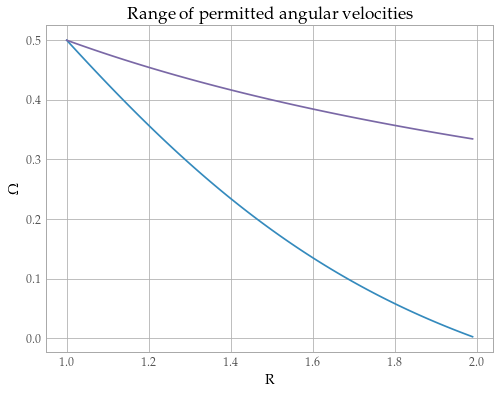

In [3]:
# equatorial section of extreme Kerr ergosphere

# R = r/GM

@np.vectorize
def omega1(R):
    return 1 - R**2/(R**2 - R + 2)

@np.vectorize
def omega2(R):
    return 1/(R + 1)

Rs = np.arange(1,2,0.01)

plt.figure()
plt.plot(Rs,omega1(Rs))
plt.plot(Rs,omega2(Rs))
plt.xlabel('R')
plt.ylabel('$\Omega$')
plt.title('Range of permitted angular velocities')
plt.show()


In [10]:
# trying polar plot

# GM = 1

@np.vectorize
def omega1(a,r,t):
    if r < 1 + np.sqrt(1 - a**2) or r > 1 + np.sqrt(1 - (a*np.cos(t))**2):
        return -1
    rho_square = r**2 + (a*np.cos(t))**2
    Delta = r**2 - 2*r + a**2
    return (2*a*r - rho_square*np.sqrt(Delta)/np.sin(t))/(rho_square*(r**2 + a**2) + 2*r*(a*np.sin(t))**2)

@np.vectorize
def omega2(a,r,t):
    if r < 1 + np.sqrt(1 - a**2) or r > 1 + np.sqrt(1 - (a*np.cos(t))**2):
        return -1
    rho_square = r**2 + (a*np.cos(t))**2
    Delta = r**2 - 2*r + a**2
    return (2*a*r + rho_square*np.sqrt(Delta)/np.sin(t))/(rho_square*(r**2 + a**2) + 2*r*(a*np.sin(t))**2)

thetas = np.arange(0.01,np.pi/2,0.01)
rs = np.arange(1,2,0.01)
values = np.zeros((len(rs),len(thetas)))
thetass,rss = np.meshgrid(thetas,rs)


%matplotlib notebook

# -k = log10(1-a)

def plot(k):
    a = 1 - 10**(-k)
    for i,t in enumerate(thetas):
        for j,r in enumerate(rs):
            values[j,i] = omega1(a,r,t)
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.set_thetamin(0)
    ax.set_thetamax(90)
    ax.set_rlim([0.98,2.02])
    ax.set_theta_zero_location('N')
    c = ax.contourf(thetass, rss, values, levels = np.arange(0,0.7,0.01)) # Why up to 0.7?
    fig.colorbar(c, label="$\\Omega_1$")
    ax.plot(thetas,(1 + np.sqrt(1 - a**2))*np.ones(len(thetas)))
    ax.plot(thetas,1 + np.sqrt(1 - (a*np.cos(thetas))**2))
    ax.set_title('a = %.3f' %a)
    
    
    
# ipw.interact(plot, a = (0,1,0.01))
ipw.interact(plot, k = (0,4,0.1))

interactive(children=(FloatSlider(value=2.0, description='k', max=4.0), Output()), _dom_classes=('widget-inter…

<function __main__.plot(k)>

In [5]:
omega1(0.9,1.9,0.01)

array(-1)